In [1]:
import pandas as pd
import numpy as np
file=pd.read_csv(r'C:\rahul\rahul\NITK\Semester IV\IET_project\samples\samples2.csv')

In [2]:
file.columns

Index(['sample', 'op_cl_op1', 'op_cl_op2', 'op_cl_op3', 'op_cl_op4',
       'op_cl_op5', 'op_cl_op6', 'op_cl_op7', 'op_cl_op8', 'op_cl_op9',
       ...
       'pn_op_pn13', 'pn_op_pn14', 'pn_op_pn15', 'pn_op_pn16', 'pn_op_pn17',
       'pn_op_pn18', 'pn_op_pn19', 'pn_op_pn20', 'pn_op_pn21', 'pn_op_pn22'],
      dtype='object', length=111)

In [3]:
sample_legend={1:'op_cl_op',2:'cl_rd_cl',3:'ex_fl_ex',4:'sp_pr_sp',5:'pn_op_pn'}
filepath=r'C:\rahul\rahul\NITK\Semester IV\IET_project\gesture'

In [4]:
def csv_pd(M):
    p=pd.DataFrame()
    for i in range(5):
        l=1
        filepath=r'C:\rahul\rahul\NITK\Semester IV\IET_project\gesture'
        #filepath=r'C:\rahul\rahul\NITK\Semester IV\IET_project\gesture\p1'
        fold_n='\p'+str(M)
        file_n='\g'+str(i+1)+'t'+str(l)+'.csv'
        col_n=sample_legend[i+1]+str(M)
        path=filepath+fold_n+file_n
            #path=filepath+file_n
            #pd_n='f'+
            #print(repr(path))
        f=pd.read_csv(path,index_col=False)
        p[col_n]=f
    return p        
    #p.head()    

In [5]:
p1=csv_pd(1)
p2=csv_pd(2)
p3=csv_pd(3)
p4=csv_pd(4)
p5=csv_pd(5)
p6=csv_pd(6)
p7=csv_pd(7)
p8=csv_pd(8)
p9=csv_pd(9)
p10=csv_pd(10)
p11=csv_pd(11)

In [6]:
p2=p2[:400]
p3=p3[:400]
p4=p4[:400]
p5=p5[:400]
p6=p6[:400]
p7=p7[:400]
p8=p8[:400]
p9=p9[:400]
p10=p10[:400]
p11=p11[:400]
p1=p1[:400]

In [7]:
p2=p2.fillna(0)
p3=p3.fillna(0)
p3=p3.fillna(0)
p4=p4.fillna(0)
p5=p5.fillna(0)
p6=p6.fillna(0)
p7=p7.fillna(0)
p8=p8.fillna(0)
p9=p9.fillna(0)
p10=p10.fillna(0)
p11=p11.fillna(0)
p1=p1.fillna(0)

In [8]:
np_arr=np.zeros((11,400,5))
np_arr[0]=p1
np_arr[1]=p2
np_arr[2]=p3
np_arr[3]=p4
np_arr[4]=p5
np_arr[5]=p6
np_arr[6]=p7
np_arr[7]=p8
np_arr[8]=p9
np_arr[9]=p10
np_arr[10]=p11

In [9]:
N=400
l=10
p=int(N/l)


In [10]:
from statistics import variance as var
from statistics import mean as mean

def rms(x):
    # x is array of 20 elements
    r,s=0,0
    for i in range(10):
        s+=x[i]**2
    r=np.sqrt(s/2)
    return r

def iemg(x):
    # x is array of 20 elements
    s=0
    for i in range(10):
        s+=x[i]
    #r=np.sqrt(s/2)
    return s

In [11]:
q=pd.DataFrame(np_arr[0])
q.head()

,0,1,2,3,4
0,2.0,13.0,1.0,128.0,1.0
1,199.0,25.0,47.0,36.0,140.0
2,203.0,31.0,51.0,34.0,127.0
3,210.0,28.0,5.0,32.0,119.0
4,201.0,28.0,104.0,29.0,143.0


In [12]:
#
rt=np.zeros((11,5,40),dtype=np.float32)
vt=np.zeros((11,5,40),dtype=np.float32)
mt=np.zeros((11,5,40),dtype=np.float32)
et=np.zeros((11,5,40),dtype=np.float32)
wt=np.zeros((11,5,40))
def feature_extract(k):
    r=np.zeros((5,40),dtype=np.float32)
    v=np.zeros((5,40),dtype=np.float32)
    m=np.zeros((5,40),dtype=np.float32)
    e=np.zeros((5,40),dtype=np.float32)
    w=np.zeros((5,40))
    st=0
    u=2*k-1
    k=k-1
    print(p)
    q=pd.DataFrame(np_arr[k])
    for i in range(5):
        st=0
        print(i)
        for j in range(p):
            print(j)
            x=list(q[i][st:st+l])
            #print(x, st)
            r[i][j]=rms(x)
            #print(r[k][i][j])
            v[i][j]=var(x)
            #print(v[k][i][j])
            m[i][j]=mean(x)
            #print(m[k][i][j])
            e[i][j]=iemg(x)
            #print(e[k][i][j])
            w[i][j]=len(x)
            st=st+l
            if (p-j)==1:
                break
    return r, v, m, e, w    

In [15]:
#
f0=pd.DataFrame()
for x in range(11):
    A=feature_extract(x+1)
    rt[x], vt[x], mt[x], et[x], wt[x] = A[0],A[1],A[2],A[3],A[4]
    g=pd.DataFrame()
    for i in range(5):
        g[i+1]=pd.concat([pd.Series(rt[x][i]), pd.Series(vt[x][i]), pd.Series(mt[x][i]), pd.Series(et[x][i])], ignore_index=True)
    f=reshape(g)
    f0=pd.concat([f0,f], axis=1, ignore_index=True)

40
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
3

In [14]:
#
def reshape(g):
    rm=np.array(g[0:40].transpose())
    #rm.shape
    a=np.reshape(rm,200)
    vr=np.array(g[40:80].transpose())
    #vr.shape
    b=np.reshape(vr,200)

    mn=np.array(g[80:120].transpose())
    #mn.shape
    c=np.reshape(mn,200)

    ie=np.array(g[120:160].transpose())
    #ie.shape
    d=np.reshape(ie,200)
    features=pd.DataFrame([a,b,c,d])
    f2=features.transpose()
    return f2

In [16]:
f0.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,437.701965,4216.622070,185.800003,1858.0,68.654938,106.544441,29.100000,291.0,70.904869,110.544441,...,281.500000,2815.0,569.475647,5536.011230,244.699997,2447.0,323.874969,5048.622070,128.199997,1282.0
1,472.787994,64.455559,211.300003,2113.0,57.905094,5.511111,25.799999,258.0,54.175640,12.222222,...,250.399994,2504.0,497.351990,11.155556,222.399994,2224.0,391.424957,3096.766602,166.899994,1669.0
2,440.661438,4338.766602,186.899994,1869.0,65.165176,28.455555,28.700001,287.0,47.127487,3.555556,...,300.299988,3003.0,469.378326,4780.933105,199.399994,1994.0,399.841217,5.733333,178.800003,1788.0
3,473.090912,81.155556,211.399994,2114.0,57.823006,9.122222,25.700001,257.0,48.124836,15.288889,...,307.100006,3071.0,502.707672,8.844444,224.800003,2248.0,379.838135,2901.555664,162.000000,1620.0
4,447.605286,4453.433105,189.899994,1899.0,57.887821,5.066667,25.799999,258.0,42.337925,9.788889,...,300.700012,3007.0,495.545166,7.155556,221.600006,2216.0,409.351929,27.555555,183.000000,1830.0


In [17]:
f0.describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,178.361877,388.942352,78.201019,782.010010,297.527374,670.230225,130.915482,1309.155029,119.983398,213.265091,...,273.369019,2733.689941,780.301392,1930.300659,345.894012,3458.939941,421.828949,447.699402,187.028473,1870.285034
std,137.435425,1071.131226,60.616199,606.161926,157.754654,1723.859131,70.281967,702.819580,82.389481,650.038086,...,108.028252,1080.282471,314.630707,7450.805664,142.107681,1421.076294,151.938065,1446.910278,69.450554,694.505737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.338661,7.255556,24.799999,248.000000,198.914543,23.908333,87.099998,871.000000,54.021325,9.736111,...,285.699989,2857.000000,682.179825,8.077778,304.025002,3040.250000,396.125046,9.677778,176.149998,1761.500000
50%,112.211327,28.672222,49.100000,491.000000,265.901154,75.916668,117.599998,1176.000000,99.472172,29.072222,...,307.000000,3070.000000,832.079803,23.911112,368.800003,3688.000000,427.027802,25.000000,190.949997,1909.500000
75%,290.956131,241.811115,127.875002,1278.750000,410.626976,369.844437,180.549999,1805.500000,187.765373,168.197220,...,324.700012,3247.000000,982.783600,89.219442,439.474998,4394.750000,506.234795,123.575001,226.074997,2260.750000
max,545.511658,9097.655273,242.199997,2422.000000,800.982239,14570.666992,353.399994,3534.000000,418.333588,7529.555664,...,524.500000,5245.000000,1395.610840,55268.320312,587.700012,5877.000000,781.461426,9452.989258,341.200012,3412.000000


In [18]:
f0[:][0:4]

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,437.701965,4216.622070,185.800003,1858.0,68.654938,106.544441,29.100000,291.0,70.904869,110.544441,...,281.500000,2815.0,569.475647,5536.011230,244.699997,2447.0,323.874969,5048.622070,128.199997,1282.0
1,472.787994,64.455559,211.300003,2113.0,57.905094,5.511111,25.799999,258.0,54.175640,12.222222,...,250.399994,2504.0,497.351990,11.155556,222.399994,2224.0,391.424957,3096.766602,166.899994,1669.0
2,440.661438,4338.766602,186.899994,1869.0,65.165176,28.455555,28.700001,287.0,47.127487,3.555556,...,300.299988,3003.0,469.378326,4780.933105,199.399994,1994.0,399.841217,5.733333,178.800003,1788.0
3,473.090912,81.155556,211.399994,2114.0,57.823006,9.122222,25.700001,257.0,48.124836,15.288889,...,307.100006,3071.0,502.707672,8.844444,224.800003,2248.0,379.838135,2901.555664,162.000000,1620.0


In [19]:
F0=f0.transpose()
F1=F0[0:4]
F2=F0[4:8]
F3=F0[8:12]
F4=F0[12:16]
F5=F0[16:20]
F6=F0[20:24]
F7=F0[24:28]
F8=F0[28:32]
F9=F0[32:36]
F10=F0[36:40]
F11=F0[40:44]

F1=F1.transpose()
F2=F2.transpose()
F3=F3.transpose()
F4=F4.transpose()
F5=F5.transpose()
F6=F6.transpose()
F7=F7.transpose()
F8=F8.transpose()
F9=F9.transpose()
F10=F10.transpose()
F11=F11.transpose()

In [21]:
F11.head(10)

,40,41,42,43
0,323.874969,5048.622070,128.199997,1282.0
1,391.424957,3096.766602,166.899994,1669.0
2,399.841217,5.733333,178.800003,1788.0
3,379.838135,2901.555664,162.000000,1620.0
4,409.351929,27.555555,183.000000,1830.0
5,397.644318,12.622222,177.800003,1778.0
6,410.362640,8.055555,183.500000,1835.0
7,413.920898,4.544445,185.100006,1851.0
8,424.449066,8.177778,189.800003,1898.0
9,409.888397,3.122222,183.300003,1833.0


In [20]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float32
 1   1       200 non-null    float32
 2   2       200 non-null    float32
 3   3       200 non-null    float32
dtypes: float32(4)
memory usage: 3.2 KB


In [24]:
F1.head(40)

,0,1,2,3
0,437.701965,4216.622070,185.800003,1858.0
1,472.787994,64.455559,211.300003,2113.0
2,440.661438,4338.766602,186.899994,1869.0
3,473.090912,81.155556,211.399994,2114.0
4,447.605286,4453.433105,189.899994,1899.0
5,454.075989,31.111111,203.000000,2030.0
6,474.368011,67.777779,212.000000,2120.0
7,261.238403,9097.655273,73.900002,739.0
8,45.546680,3.122222,20.299999,203.0
9,47.428894,5.211111,21.100000,211.0


In [44]:
y=[0]*40+[1]*40+[2]*40+[3]*40+[4]*40
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [26]:
F1['x']=x
F1.head()

,0,1,2,3,x
0,437.701965,4216.622070,185.800003,1858.0,0
1,472.787994,64.455559,211.300003,2113.0,0
2,440.661438,4338.766602,186.899994,1869.0,0
3,473.090912,81.155556,211.399994,2114.0,0
4,447.605286,4453.433105,189.899994,1899.0,0


In [27]:
F1=F1.drop(columns=['x'])
F1.head()

,0,1,2,3
0,437.701965,4216.622070,185.800003,1858.0
1,472.787994,64.455559,211.300003,2113.0
2,440.661438,4338.766602,186.899994,1869.0
3,473.090912,81.155556,211.399994,2114.0
4,447.605286,4453.433105,189.899994,1899.0


In [79]:
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your data is already loaded into X and y
# X shape: (200, 4)
# y shape: (200,)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(F1, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', gamma=0.005)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.425


C:\sbasu\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\sbasu\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\sbasu\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\sbasu\softwar

<AxesSubplot:xlabel='0', ylabel='2'>

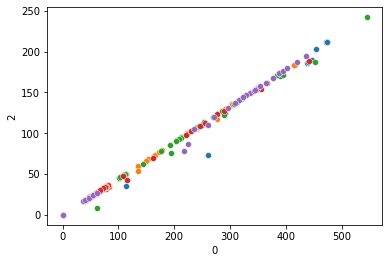

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(F1[0][0:39],F1[2][0:39])
sns.scatterplot(F1[0][40:79],F1[2][40:79])
sns.scatterplot(F1[0][80:119],F1[2][80:119])
sns.scatterplot(F1[0][120:159],F1[2][120:159])
sns.scatterplot(F1[0][160:199],F1[2][160:199])


#plt.legend()

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

# Assuming your data is stored in a 2D numpy array named 'data'
# where each row represents a sample and each column represents a feature

# One-hot encode the labels (assuming labels are integers 0-4)
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(y)  # Separate labels

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(F1, labels, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # Choose kernel (linear for simplicity)
svm_model.fit(X_train, y_train)

# Make predictions on new data (replace with your new data)
new_data = np.array([[1, 2, 3, 4]])  # Example data point
new_label = svm_model.predict(new_data)

# Decode the predicted label
predicted_gesture = np.argmax(new_label[0])  # Get index of maximum value

print("Predicted gesture:", predicted_gesture)


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [48]:
len(y)

200

In [80]:
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your data is in two separate lists
# features: A list of size 200, where each element is a list of 4 features (predictors)
# labels: A separate list of size 200 containing the integer labels (0-4) for each sample

# One-hot encode the labels
#encoder = OneHotEncoder(sparse=False)
#labels_encoded = encoder.fit_transform((np.array(y)).reshape(-1, 1))  # Reshape for encoding

# Convert features list to numpy array
features_np = np.array(F1)

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(features_np, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # Choose kernel (linear for simplicity)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.35


In [95]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is in two separate lists
# features: A list of size 200, where each element is a list of 4 features (predictors)
# labels: A separate list of size 200 containing the integer labels (0-4) for each sample

# One-hot encode the labels (if necessary)
if len(np.unique(y)) > 2:  # Check if labels require one-hot encoding
    encoder = OneHotEncoder(sparse=False)
    labels_encoded = encoder.fit_transform(np.array(y).reshape(-1, 1))
else:
    labels_encoded = np.array(y)  # No encoding for binary classification

# Convert features list to numpy array
features_np = np.array(F1)

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)  # Adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.35


In [98]:
import tensorflow.keras

ModuleNotFoundError: No module named 'tensorflow'

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Assuming your data is preprocessed into 2D images (e.g., 28x28 pixels)
# features: A list of size 200, where each element is a 2D NumPy array representing an image
# labels: A separate list of size 200 containing the integer labels (0-4) for each sample

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform(np.array(labels).reshape(-1, 1))

# Convert features list to NumPy array
features_np = np.array(features)

# Reshape features to include channels (assuming grayscale images)
features_np = features_np.reshape(-1, 28, 28, 1)  # Adjust dimensions if images are RGB

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)

# Data augmentation (optional, for small datasets)
datagen = ImageDataGenerator(
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)  # Adjust parameters as needed
datagen.fit(X_train)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(4, 1)))  # Adjust filter size, number of filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Adjust number of neurons
model.add(Dense(5, activation='softmax'))  # 5 output neurons for 5 gestures

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with data augmentation (optional)
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


ModuleNotFoundError: No module named 'tensorflow'

In [57]:
np.array(y).shape

(200,)

In [60]:
name=filepath+'\\F1.csv'
F1.to_csv(name, index=False)